In [9]:
import numpy as np
import pandas as pd

x_data = pd.read_csv('../data/q4/q4x.dat', sep='\s+', header=None)
y_data = pd.read_csv('../data/q4/q4y.dat', header=None)



(     0    1
 0  108  368
 1  131  355
 2  105  469
 3   86  506
 4   99  402,
         0
 0  Alaska
 1  Alaska
 2  Alaska
 3  Alaska
 4  Alaska)

In [10]:
x_mean = x_data.mean()
x_std = x_data.std()

x_normalized = (x_data - x_mean) / x_std

x_normalized.head()


,0,1
0,-0.381523,-0.651816
1,0.503057,-0.932958
2,-0.496903,1.532438
3,-1.227643,2.332610
4,-0.727663,0.083477


In [11]:
# Convert labels to numerical values (Alaska: 0, Canada: 1)
y_numerical = y_data[0].map({'Alaska': 0, 'Canada': 1}).values

mu_0 = np.sum(x_normalized[y_numerical == 0], axis=0) / np.sum(y_numerical == 0)
mu_1 = np.sum(x_normalized[y_numerical == 1], axis=0) / np.sum(y_numerical == 1)

# Calculate the shared covariance matrix (Sigma)
m = len(y_numerical)
Sigma = np.zeros((2, 2))
for i in range(m):
    xi = x_normalized.iloc[i].values
    mu_yi = mu_0 if y_numerical[i] == 0 else mu_1
    Sigma += np.outer(xi - mu_yi, xi - mu_yi)
Sigma /= m

mu_0, mu_1, Sigma


(0   -0.751508
 1    0.681660
 dtype: float64,
 0    0.751508
 1   -0.681660
 dtype: float64,
 array([[ 0.42523517, -0.02224756],
        [-0.02224756,  0.52533933]]))

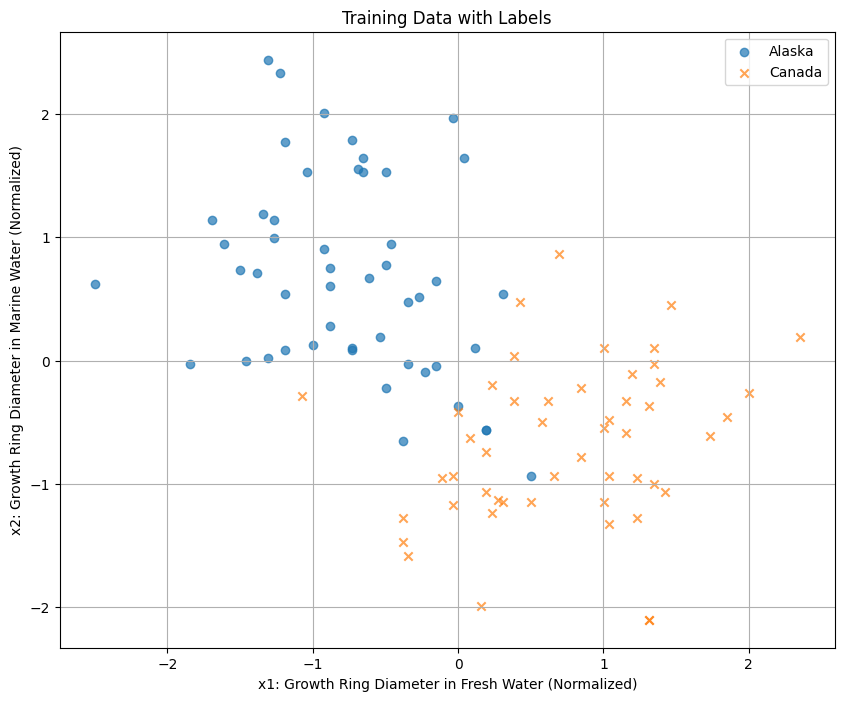

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(x_normalized[y_numerical == 0][0], x_normalized[y_numerical == 0][1], marker='o', label='Alaska', alpha=0.7)
plt.scatter(x_normalized[y_numerical == 1][0], x_normalized[y_numerical == 1][1], marker='x', label='Canada', alpha=0.7)

plt.xlabel('x1: Growth Ring Diameter in Fresh Water (Normalized)')
plt.ylabel('x2: Growth Ring Diameter in Marine Water (Normalized)')
plt.title('Training Data with Labels')
plt.legend()
plt.grid(True)
plt.savefig('plot 1.jpg')
plt.show()


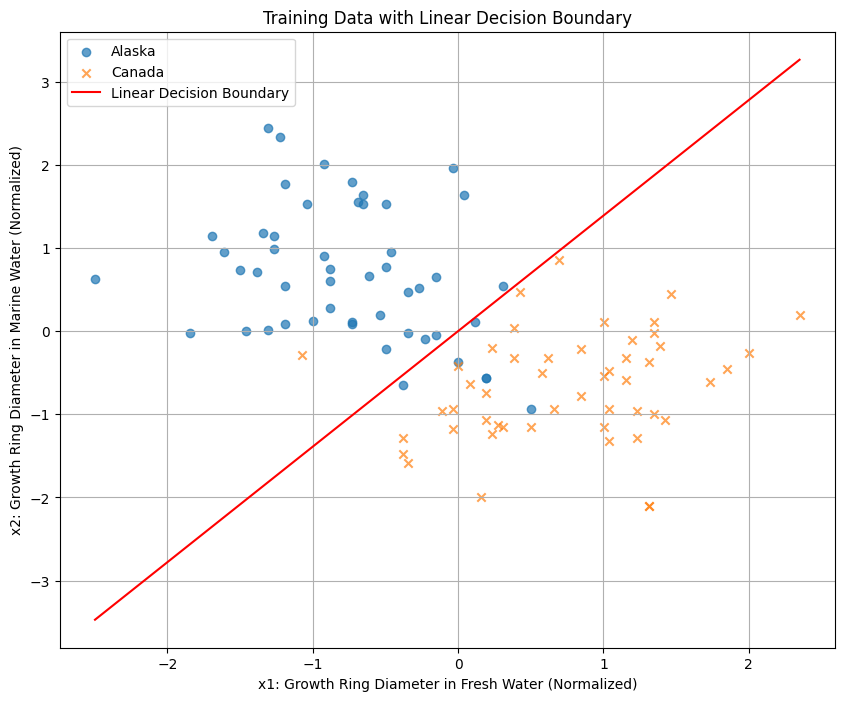

array([ 3.40632896, -2.45086913])

In [17]:
Sigma_inv = np.linalg.inv(Sigma)
theta = np.dot(Sigma_inv, (mu_1 - mu_0).values)

x1_range = np.linspace(min(x_normalized[0]), max(x_normalized[0]), 100)
x2_range = -(theta[0] / theta[1]) * x1_range  # Solve for x2 from theta^T x = 0

plt.figure(figsize=(10, 8))
plt.scatter(x_normalized[y_numerical == 0][0], x_normalized[y_numerical == 0][1], marker='o', label='Alaska', alpha=0.7)
plt.scatter(x_normalized[y_numerical == 1][0], x_normalized[y_numerical == 1][1], marker='x', label='Canada', alpha=0.7)

plt.plot(x1_range, x2_range, label='Linear Decision Boundary', color='red')

plt.xlabel('x1: Growth Ring Diameter in Fresh Water (Normalized)')
plt.ylabel('x2: Growth Ring Diameter in Marine Water (Normalized)')
plt.title('Training Data with Linear Decision Boundary')
plt.legend()
plt.grid(True)
plt.savefig('plot 2.jpg')
plt.show()

theta


In [14]:
Sigma_0 = np.zeros((2, 2))
Sigma_1 = np.zeros((2, 2))

for i in range(m):
    xi = x_normalized.iloc[i].values
    if y_numerical[i] == 0:
        Sigma_0 += np.outer(xi - mu_0, xi - mu_0)
    else:
        Sigma_1 += np.outer(xi - mu_1, xi - mu_1)

Sigma_0 /= np.sum(y_numerical == 0)
Sigma_1 /= np.sum(y_numerical == 1)

Sigma_0, Sigma_1


(array([[ 0.37777389, -0.15331651],
        [-0.15331651,  0.6412598 ]]),
 array([[0.47269646, 0.10882139],
        [0.10882139, 0.40941887]]))

/var/folders/cx/8v11zwh97cxgdgt_ph13_56r0000gn/T/ipykernel_28172/3984488078.py:26: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, Z, levels=[0], colors='green', label='Quadratic Decision Boundary')


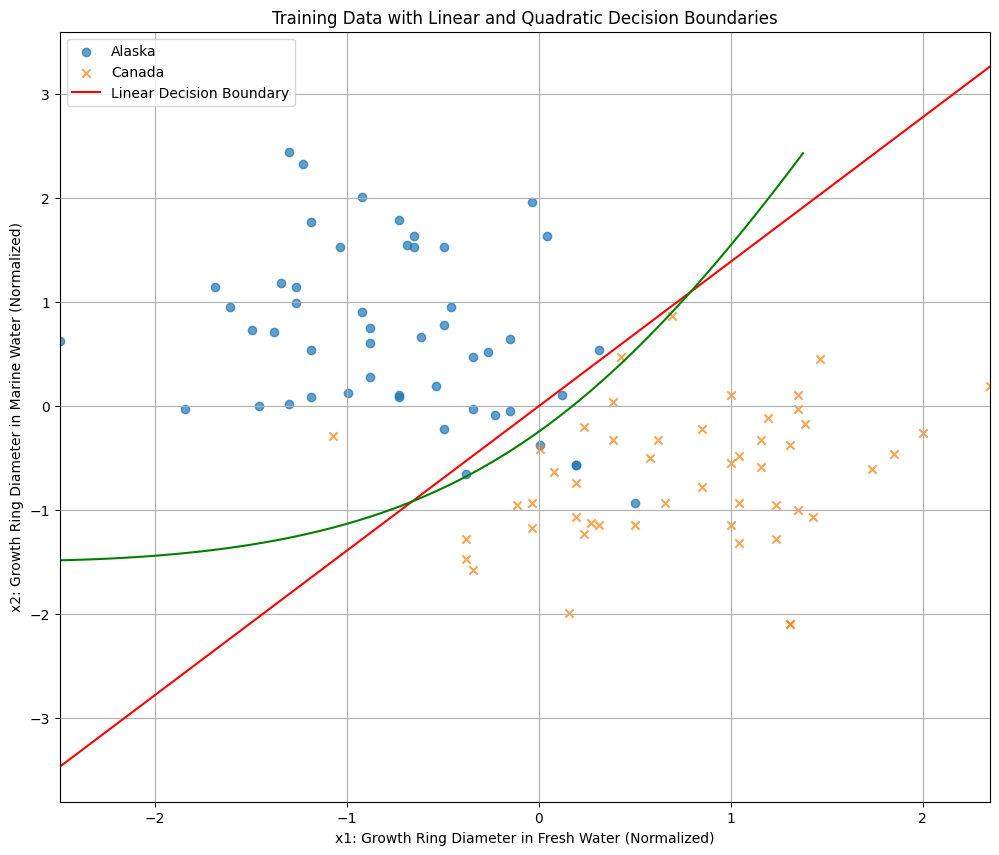

In [18]:
Sigma_0_inv = np.linalg.inv(Sigma_0)
Sigma_1_inv = np.linalg.inv(Sigma_1)

x1_vals = np.linspace(min(x_normalized[0]), max(x_normalized[0]), 100)
x2_vals = np.linspace(min(x_normalized[1]), max(x_normalized[1]), 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = np.zeros(X1.shape)

# Evaluate the quadratic decision boundary equation at each point in the meshgrid
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = np.dot(np.dot((x - mu_0), Sigma_0_inv), (x - mu_0)) - np.dot(np.dot((x - mu_1), Sigma_1_inv), (x - mu_1))

# Scatter plot for training data
plt.figure(figsize=(12, 10))
plt.scatter(x_normalized[y_numerical == 0][0], x_normalized[y_numerical == 0][1], marker='o', label='Alaska', alpha=0.7)
plt.scatter(x_normalized[y_numerical == 1][0], x_normalized[y_numerical == 1][1], marker='x', label='Canada', alpha=0.7)

# Plot the linear decision boundary
plt.plot(x1_range, x2_range, label='Linear Decision Boundary', color='red')

# Plot the quadratic decision boundary as contour line
plt.contour(X1, X2, Z, levels=[0], colors='green', label='Quadratic Decision Boundary')

plt.xlabel('x1: Growth Ring Diameter in Fresh Water (Normalized)')
plt.ylabel('x2: Growth Ring Diameter in Marine Water (Normalized)')
plt.title('Training Data with Linear and Quadratic Decision Boundaries')
plt.legend()
plt.grid(True)
plt.savefig('plot 3.jpg')
plt.show()
